# Word2Vec (Assignment)

Assignment Instruction

1.  Try a real corpus (instead of banana apple, try something real... on the internet....) - not so big!  Just so you have a good taste of real stuff....like 50 documents, each having 50 words...(really up to you)

2. Try a window size of 2

3. Implement CBOW (instead of skipgrams)

4. Compare normal version of skipgrams vs. negative sampling version of skipgrams in terms of time (using real corpus)

Point criteria:
0: not done/copy directly from your friend (inspired is ok)
1: ok
2: with comments, and a nice explanation along the notebook (like how Chaky do his tutorial...)

I will use Negative sampling both skipgram.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import spacy

### 1. Load data

In [2]:
# Load tokeniser from SpaCy. I will use only small version.

tokeniser = spacy.load("en_core_web_sm")

In [3]:
#define corpus from real world messages.

corpus = ["The cat (Felis catus) is a domestic species of small carnivorous mammal. It is the only domesticated species in the family Felidae and is commonly referred to as the domestic cat or house cat to distinguish it from the wild members of the family. Cats are commonly kept as house pets but can also be farm cats or feral cats; the feral cat ranges freely and avoids human contact. Domestic cats are valued by humans for companionship and their ability to kill rodents. About 60 cat breeds are recognized by various cat registries.",
         "The cat is similar in anatomy to the other felid species: it has a strong flexible body, quick reflexes, sharp teeth, and retractable claws adapted to killing small prey. Its night vision and sense of smell are well developed. Cat communication includes vocalizations like meowing, purring, trilling, hissing, growling, and grunting as well as cat-specific body language. Although the cat is a social species, it is a solitary hunter. As a predator, it is crepuscular, i.e. most active at dawn and dusk. It can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small mammals. It also secretes and perceives pheromones.",
         "Female domestic cats can have kittens from spring to late autumn, with litter sizes often ranging from two to five kittens. Domestic cats are bred and shown at events as registered pedigreed cats, a hobby known as cat fancy. Population control of cats may be effected by spaying and neutering, but their proliferation and the abandonment of pets has resulted in large numbers of feral cats worldwide, contributing to the extinction of entire bird, mammal, and reptile species.",
         "It was long thought that cat domestication began in ancient Egypt, where cats were venerated from around 3100 BC, but recent advances in archaeology and genetics have shown that their domestication occurred in Western Asia around 7500 BC.",
         "As of 2021, there were an estimated 220 million owned and 480 million stray cats in the world. As of 2017, the domestic cat was the second most popular pet in the United States, with 95.6 million cats owned and around 42 million households owning at least one cat. In the United Kingdom, 26% of adults have a cat, with an estimated population of 10.9 million pet cats as of 2020.",
         "The scientific name Felis catus was proposed by Carl Linnaeus in 1758 for a domestic cat. Felis catus domesticus was proposed by Johann Christian Polycarp Erxleben in 1777. Felis daemon proposed by Konstantin Satunin in 1904 was a black cat from the Transcaucasus, later identified as a domestic cat.",
         "In 2003, the International Commission on Zoological Nomenclature ruled that the domestic cat is a distinct species, namely Felis catus. In 2007, it was considered a subspecies, F. silvestris catus, of the European wildcat (F. silvestris) following results of phylogenetic research. In 2017, the IUCN Cat Classification Taskforce followed the recommendation of the ICZN in regarding the domestic cat as a distinct species, Felis catus.",
         "The domestic cat is a member of the Felidae, a family that had a common ancestor about 10–15 million years ago. The genus Felis diverged from other Felidae around 6–7 million years ago. Results of phylogenetic research confirm that the wild Felis species evolved through sympatric or parapatric speciation, whereas the domestic cat evolved through artificial selection. The domesticated cat and its closest wild ancestor are diploid and both possess 38 chromosomes and roughly 20,000 genes. The leopard cat (Prionailurus bengalensis) was tamed independently in China around 5500 BC. This line of partially domesticated cats leaves no trace in the domestic cat populations of today.",
         "The earliest known indication for the taming of an African wildcat (F. lybica) was excavated close by a human Neolithic grave in Shillourokambos, southern Cyprus, dating to about 7500–7200 BC. Since there is no evidence of native mammalian fauna on Cyprus, the inhabitants of this Neolithic village most likely brought the cat and other wild mammals to the island from the Middle Eastern mainland.[48] Scientists therefore assume that African wildcats were attracted to early human settlements in the Fertile Crescent by rodents, in particular the house mouse (Mus musculus), and were tamed by Neolithic farmers. This mutual relationship between early farmers and tamed cats lasted thousands of years. As agricultural practices spread, so did tame and domesticated cats. Wildcats of Egypt contributed to the maternal gene pool of the domestic cat at a later time.",
         "The earliest known evidence for the occurrence of the domestic cat in Greece dates to around 1200 BC. Greek, Phoenician, Carthaginian and Etruscan traders introduced domestic cats to southern Europe. During the Roman Empire they were introduced to Corsica and Sardinia before the beginning of the 1st millennium. By the 5th century BC, they were familiar animals around settlements in Magna Graecia and Etruria.[52] By the end of the Western Roman Empire in the 5th century, the Egyptian domestic cat lineage had arrived in a Baltic Sea port in northern Germany.",
         "During domestication, cats have undergone only minor changes in anatomy and behavior, and they are still capable of surviving in the wild. Several natural behaviors and characteristics of wildcats may have pre-adapted them for domestication as pets. These traits include their small size, social nature, obvious body language, love of play and relatively high intelligence. Captive Leopardus cats may also display affectionate behavior toward humans but were not domesticated. House cats often mate with feral cats. Hybridisation between domestic and other Felinae species is also possible, producing hybrids such as the Kellas cat in Scotland.",
         "Development of cat breeds started in the mid 19th century. An analysis of the domestic cat genome revealed that the ancestral wildcat genome was significantly altered in the process of domestication, as specific mutations were selected to develop cat breeds. Most breeds are founded on random-bred domestic cats. Genetic diversity of these breeds varies between regions, and is lowest in purebred populations, which show more than 20 deleterious genetic disorders.",
         "The domestic cat has a smaller skull and shorter bones than the European wildcat. It averages about 46 cm (18 in) in head-to-body length and 23–25 cm (9–10 in) in height, with about 30 cm (12 in) long tails. Males are larger than females. Adult domestic cats typically weigh between 4 and 5 kg (9 and 11 lb).",
         "Cats have seven cervical vertebrae (as do most mammals); 13 thoracic vertebrae (humans have 12); seven lumbar vertebrae (humans have five); three sacral vertebrae (as do most mammals, but humans have five); and a variable number of caudal vertebrae in the tail (humans have only three to five vestigial caudal vertebrae, fused into an internal coccyx). The extra lumbar and thoracic vertebrae account for the cat's spinal mobility and flexibility. Attached to the spine are 13 ribs, the shoulder, and the pelvis. Unlike human arms, cat forelimbs are attached to the shoulder by free-floating clavicle bones which allow them to pass their body through any space into which they can fit their head.",
         "The cat skull is unusual among mammals in having very large eye sockets and a powerful specialized jaw.  Within the jaw, cats have teeth adapted for killing prey and tearing meat. When it overpowers its prey, a cat delivers a lethal neck bite with its two long canine teeth, inserting them between two of the prey's vertebrae and severing its spinal cord, causing irreversible paralysis and death. Compared to other felines, domestic cats have narrowly spaced canine teeth relative to the size of their jaw, which is an adaptation to their preferred prey of small rodents, which have small vertebrae.",
         "The premolar and first molar together compose the carnassial pair on each side of the mouth, which efficiently shears meat into small pieces, like a pair of scissors. These are vital in feeding, since cats' small molars cannot chew food effectively, and cats are largely incapable of mastication.  Although cats tend to have better teeth than most humans, with decay generally less likely because of a thicker protective layer of enamel, a less damaging saliva, less retention of food particles between teeth, and a diet mostly devoid of sugar, they are nonetheless subject to occasional tooth loss and infection.",
         "Cats have protractible and retractable claws. In their normal, relaxed position, the claws are sheathed with the skin and fur around the paw's toe pads. This keeps the claws sharp by preventing wear from contact with the ground and allows for the silent stalking of prey. The claws on the forefeet are typically sharper than those on the hindfeet. Cats can voluntarily extend their claws on one or more paws. They may extend their claws in hunting or self-defense, climbing, kneading, or for extra traction on soft surfaces. Cats shed the outside layer of their claw sheaths when scratching rough surfaces.",
         "Most cats have five claws on their front paws and four on their rear paws. The dewclaw is proximal to the other claws. More proximally is a protrusion which appears to be a sixth \"finger\". This special feature of the front paws on the inside of the wrists has no function in normal walking but is thought to be an antiskidding device used while jumping. Some cat breeds are prone to having extra digits (\"polydactyly\"). Polydactylous cats occur along North America's northeast coast and in Great Britain.",
         "The cat is digitigrade. It walks on the toes, with the bones of the feet making up the lower part of the visible leg. Unlike most mammals, it uses a \"pacing\" gait and moves both legs on one side of the body before the legs on the other side. It registers directly by placing each hind paw close to the track of the corresponding fore paw, minimizing noise and visible tracks. This also provides sure footing for hind paws when navigating rough terrain. As it speeds up from walking to trotting, its gait changes to a \"diagonal\" gait: The diagonally opposite hind and fore legs move simultaneously.",
         "Most breeds of cat are notably fond of sitting in high places, or perching. A higher place may serve as a concealed site from which to hunt; domestic cats strike prey by pouncing from a perch such as a tree branch. Another possible explanation is that height gives the cat a better observation point, allowing it to survey its territory. A cat falling from heights of up to 3 meters (9.8 ft) can right itself and land on its paws.",
         "During a fall from a high place, a cat reflexively twists its body and rights itself to land on its feet using its acute sense of balance and flexibility. This reflex is known as the cat righting reflex. A cat always rights itself in the same way during a fall, if it has enough time to do so, which is the case in falls of 90 cm (2 ft 11 in) or more. How cats are able to right themselves when falling has been investigated as the \"falling cat problem\".",
         "The cat family (Felidae) can pass down many colors and patterns to their offsprings. The domestic cat genes MC1R and ASIP allow for the variety of color in coats. The feline ASIP gene consists of three coding exons. Three novel microsatellite markers linked to ASIP were isolated from a domestic cat BAC clone containing this gene and were used to perform linkage analysis in a pedigree of 89 domestic cats that segregated for melanism.",
         "Cats have excellent night vision and can see at only one-sixth the light level required for human vision. This is partly the result of cat eyes having a tapetum lucidum, which reflects any light that passes through the retina back into the eye, thereby increasing the eye's sensitivity to dim light. Large pupils are an adaptation to dim light. The domestic cat has slit pupils, which allow it to focus bright light without chromatic aberration. At low light, a cat's pupils expand to cover most of the exposed surface of its eyes. The domestic cat has rather poor color vision and only two types of cone cells, optimized for sensitivity to blue and yellowish green; its ability to distinguish between red and green is limited. A response to middle wavelengths from a system other than the rod cells might be due to a third type of cone. This appears to be an adaptation to low light levels rather than representing true trichromatic vision. Cats also have a nictitating membrane, allowing them to blink without hindering their vision.",
         "The domestic cat's hearing is most acute in the range of 500 Hz to 32 kHz. It can detect an extremely broad range of frequencies ranging from 55 Hz to 79 kHz. It can hear a range of 10.5 octaves, while humans and dogs can hear ranges of about 9 octaves. Its hearing sensitivity is enhanced by its large movable outer ears, the pinnae, which amplify sounds and help detect the location of a noise. It can detect ultrasound, which enables it to detect ultrasonic calls made by rodent prey. Recent research has shown that cats have socio-spatial cognitive abilities to create mental maps of owners' locations based on hearing owners' voices.",
         "Cats have an acute sense of smell, due in part to their well-developed olfactory bulb and a large surface of olfactory mucosa, about 5.8 square centimetres (29⁄32 square inch) in area, which is about twice that of humans. Cats and many other animals have a Jacobson's organ in their mouths that is used in the behavioral process of flehmening. It allows them to sense certain aromas in a way that humans cannot. Cats are sensitive to pheromones such as 3-mercapto-3-methylbutan-1-ol, which they use to communicate through urine spraying and marking with scent glands. Many cats also respond strongly to plants that contain nepetalactone, especially catnip, as they can detect that substance at less than one part per billion. About 70–80% of cats are affected by nepetalactone. This response is also produced by other plants, such as silver vine (Actinidia polygama) and the herb valerian; it may be caused by the smell of these plants mimicking a pheromone and stimulating cats' social or sexual behaviors.",
         "Cats have relatively few taste buds compared to humans (470 or so versus more than 9,000 on the human tongue).[97] Domestic and wild cats share a taste receptor gene mutation that keeps their sweet taste buds from binding to sugary molecules, leaving them with no ability to taste sweetness. Their taste buds instead respond to acids, amino acids like protein, and bitter tastes. Cats also have a distinct temperature preference for their food, preferring food with a temperature around 38 °C (100 °F) which is similar to that of a fresh kill and routinely rejecting food presented cold or refrigerated (which would signal to the cat that the \"prey\" item is long dead and therefore possibly toxic or decomposing).",
         "To aid with navigation and sensation, cats have dozens of movable whiskers (vibrissae) over their body, especially their faces. These provide information on the width of gaps and on the location of objects in the dark, both by touching objects directly and by sensing air currents; they also trigger protective blink reflexes to protect the eyes from damage."]

corpus_tokenised = []
for i in range(len(corpus)):
    corpus_tokenised.append([str(token) for token in tokeniser([c for c in corpus][i])])
# corpus_tokenised

In [4]:
#delete duplicate word define as vocabs, also include unknow as <UNK>.
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs  = list(set(flatten(corpus_tokenised)))
vocabs.append('<UNK>') # to let '<UNK>' become the last.
word2index = {v: idx+1 for idx, v in enumerate(vocabs)} #plus one to shift value in word index to assign <UNK>'s value to 0 without duplication with others.
word2index['<UNK>'] = 0

#Let check word to index's value
word2index["cat"]

151

In [5]:
# Create index to word
index2word = {v:k for k, v in word2index.items()}

index2word[50]

'Taskforce'

### 2. Prepare train data

In [6]:
skipgrams = []

#for each corpus
for sent in corpus_tokenised:
    #for each sent ["apple", "banana", "fruit"]
    for i in range(2, len(sent) - 2): # start from 1 to second last but we use window size of 2, then first centre word should be at index 2
        center_word = sent[i]
        outside_words = np.ravel([sent[i - 2:i],sent[i+1: i + 3]])  # window_size = 2
        for o in outside_words:
            skipgrams.append([center_word, o])

skipgrams[:50] #shows only sample 50 elements

[['(', 'The'],
 ['(', 'cat'],
 ['(', 'Felis'],
 ['(', 'catus'],
 ['Felis', 'cat'],
 ['Felis', '('],
 ['Felis', 'catus'],
 ['Felis', ')'],
 ['catus', '('],
 ['catus', 'Felis'],
 ['catus', ')'],
 ['catus', 'is'],
 [')', 'Felis'],
 [')', 'catus'],
 [')', 'is'],
 [')', 'a'],
 ['is', 'catus'],
 ['is', ')'],
 ['is', 'a'],
 ['is', 'domestic'],
 ['a', ')'],
 ['a', 'is'],
 ['a', 'domestic'],
 ['a', 'species'],
 ['domestic', 'is'],
 ['domestic', 'a'],
 ['domestic', 'species'],
 ['domestic', 'of'],
 ['species', 'a'],
 ['species', 'domestic'],
 ['species', 'of'],
 ['species', 'small'],
 ['of', 'domestic'],
 ['of', 'species'],
 ['of', 'small'],
 ['of', 'carnivorous'],
 ['small', 'species'],
 ['small', 'of'],
 ['small', 'carnivorous'],
 ['small', 'mammal'],
 ['carnivorous', 'of'],
 ['carnivorous', 'small'],
 ['carnivorous', 'mammal'],
 ['carnivorous', '.'],
 ['mammal', 'small'],
 ['mammal', 'carnivorous'],
 ['mammal', '.'],
 ['mammal', 'It'],
 ['.', 'carnivorous'],
 ['.', 'mammal']]

In [7]:
def random_batch(batch_size, corpus):
    
    skipgrams = []

    for sent in corpus:
        for i in range(2, len(sent) - 2): #start from 2 to third last for window size = 2
            centre_word = word2index[sent[i]]
            outside_words = []
            for j in np.ravel([sent[i - 2:i],sent[i + 1: i + 3]]):
                outside_words.append(word2index[j])  #window_size = 2
            for o in outside_words:
                skipgrams.append([centre_word, o])
                
    #only get a batch, not the entire list
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([skipgrams[index][0]])  #center words, this will be a shape of (1, ) --> (1, 1) for modeling
        random_labels.append([skipgrams[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)

In [8]:
input, label = random_batch(10, corpus_tokenised)

print(f"{input.shape}")
print(f"{label=}")

(10, 1)
label=array([[399],
       [786],
       [974],
       [492],
       [817],
       [888],
       [ 94],
       [320],
       [256],
       [331]])


### 3. Unigram distribution

$$P(w)=U(w)^{3/4}/Z$$

Defining the probability of sampling negative words

In [9]:
from collections import Counter

word_count = Counter(flatten(corpus_tokenised))
# word_count # Showing word count

In [10]:
num_total_words = sum([c for w, c in word_count.items()])
num_total_words

2898

In [11]:
z = 0.001  #scaling up low frequency terms
unigram_table = []

# create loop for the P(w) formula
for v in vocabs:
    uw = word_count[v]/num_total_words
    uw_alpha = uw ** (3/4)
    uw_alpha_dividebyz = int(uw_alpha / z)
    unigram_table.extend([v] * uw_alpha_dividebyz)
    
# Counter(unigram_table)

### 4. Negative sampling

In [12]:
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

In [13]:
import random

def negative_sampling(targets, unigram_table, k):
    
    batch_size = targets.shape[0]
    neg_samples = []
    
    for i in range(batch_size):
        #randomly pick k negative words from unigram_table
        target_index = targets[i].item()  #looping each of the batch....
        nsample = []
        while len(nsample) < k:
            neg = random.choice(unigram_table)
            #if this word == target, skip this word
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        #append this word to some list
        neg_samples.append(prepare_sequence(nsample, word2index).reshape(1, -1))  #tensor[], tensor[]
    return torch.cat(neg_samples)

In [14]:
batch_size = 2
input_batch, label_batch = random_batch(batch_size, corpus_tokenised)

input_batch, label_batch

(array([[161],
        [254]]),
 array([[865],
        [674]]))

In [15]:
# Convert to Tensor

input_batch = torch.LongTensor(input_batch)
label_batch = torch.LongTensor(label_batch)

In [16]:
num_neg = 10  # I will try 10 as in the paper.
neg_samples = negative_sampling(label_batch, unigram_table, num_neg)

In [17]:
neg_samples.shape # shape is (batch_size, num_neg)

torch.Size([2, 10])

### 5. Model

$$\mathbf{J}_{\text{neg-sample}}(\mathbf{v}_c,o,\mathbf{U})=-\log(\sigma(\mathbf{u}_o^T\mathbf{v}_c))-\sum_{k=1}^K\log(\sigma(-\mathbf{u}_k^T\mathbf{v}_c))$$

In [18]:
class SkipgramNeg(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(SkipgramNeg, self).__init__()
        self.embedding_centre_word  = nn.Embedding(voc_size, emb_size)
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
        self.logsigmoid = nn.LogSigmoid()
        
    def forward(self, centre_words, outside_words, negative_words):
        #center_words, outside_words: (batch_size, 1)
        #negative_words:  (batch_size, k)
        
        centre_embed  = self.embedding_centre_word(centre_words)    #(batch_size, 1, emb_size)
        outside_embed = self.embedding_outside_word(outside_words)  #(batch_size, 1, emb_size)
        neg_embed     = self.embedding_outside_word(negative_words) #(batch_size, k, emb_size)
        
        uovc          =  outside_embed.bmm(centre_embed.transpose(1, 2)).squeeze(2)  #(batch_size, 1)
        ukvc          = -neg_embed.bmm(centre_embed.transpose(1, 2)).squeeze(2)  #(batch_size, k)
        ukvc_sum      =  torch.sum(ukvc, 1).view(-1, 1) #(batch_size, 1)
        
        loss = self.logsigmoid(uovc) + self.logsigmoid(ukvc_sum)  #(batch_size, 1) + (batch_size, 1)
                
        return -torch.mean(loss)  #scalar, loss should be scalar, to call backward()

In [19]:
input, label = random_batch(batch_size, corpus_tokenised)
input_tensor = torch.LongTensor(input)  
label_tensor = torch.LongTensor(label)

In [20]:
emb_size = 10 # I will try on 10.
voc_size = len(vocabs)
model = SkipgramNeg(voc_size, emb_size)

In [21]:
neg_tensor = negative_sampling(label_tensor, unigram_table, 5)

In [22]:
input_tensor.shape, label_tensor.shape

(torch.Size([2, 1]), torch.Size([2, 1]))

In [23]:
loss = model(input_tensor, label_tensor, neg_tensor)
loss

tensor(1.9826, grad_fn=<NegBackward0>)

### 4. Training

In [24]:
voc_size   = len(vocabs)
batch_size = 2
emb_size   = 10
model      = SkipgramNeg(voc_size, emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

In [25]:
num_epochs = 5000

for epoch in range(num_epochs):

    #get random batch
    input_batch, label_batch = random_batch(batch_size, corpus_tokenised)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    neg_batch   = negative_sampling(label_batch, unigram_table, 5)    
    
    #loss = model
    loss = model(input_batch, label_batch, neg_batch)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1} | Loss: {loss:.6f} | Time: ??")

Epoch 1000 | Loss: 10.387959 | Time: ??
Epoch 2000 | Loss: 0.290944 | Time: ??
Epoch 3000 | Loss: 14.202784 | Time: ??
Epoch 4000 | Loss: 57.004852 | Time: ??
Epoch 5000 | Loss: 21.632616 | Time: ??


### 5. Plot the embeddings

In [26]:
cat = torch.LongTensor([word2index['cat']])
cat

tensor([151])

In [27]:
cat_centre_embed = model.embedding_centre_word(cat)
cat_outside_embed = model.embedding_outside_word(cat)

cat_embed = (cat_centre_embed + cat_outside_embed) / 2
cat_embed

tensor([[-0.1392, -0.6659,  1.6301, -1.0148, -0.2499, -1.0868,  2.5226,  0.7519,
         -1.5699, -0.5834]], grad_fn=<DivBackward0>)

In [28]:
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_centre_word(word)
    outside_embed = model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()

In [29]:
print(get_embed('cat'))

(-0.13924795389175415, -0.665895402431488)


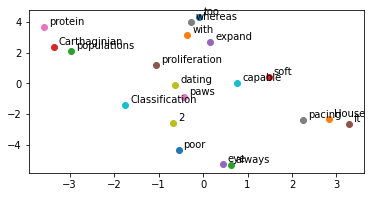

In [30]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

### 6. Try on CBOW

In [31]:
#delete duplicate word define as vocabs, also include unknow as <UNK>.
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs  = list(set(flatten(corpus_tokenised)))
vocabs.append('<UNK>') # to let '<UNK>' become the last.
word2index = {v: idx+1 for idx, v in enumerate(vocabs)} #plus one to shift value in word index to assign <UNK>'s value to 0 without duplication with others.
word2index['<UNK>'] = 0

#Let check word to index's value
word2index["cat"]

151

In [32]:
# Create index to word
index2word = {v:k for k, v in word2index.items()}

index2word[50]

'Taskforce'

#### Prepare train data

I use same way but change the variable to not making myself get confused.

In [33]:
CBOW = []

#for each corpus
for sent in corpus_tokenised:
    #for each sent ["apple", "banana", "fruit"]
    for i in range(2, len(sent) - 2): # start from 1 to second last but we use window size of 2, then first centre word should be at index 2
        center_word = sent[i]
        outside_words = np.ravel([sent[i - 2:i],sent[i+1: i + 3]])  # window_size = 2
        for o in outside_words:
            CBOW.append([center_word, o])

CBOW[:50] #shows only sample 50 elements

[['(', 'The'],
 ['(', 'cat'],
 ['(', 'Felis'],
 ['(', 'catus'],
 ['Felis', 'cat'],
 ['Felis', '('],
 ['Felis', 'catus'],
 ['Felis', ')'],
 ['catus', '('],
 ['catus', 'Felis'],
 ['catus', ')'],
 ['catus', 'is'],
 [')', 'Felis'],
 [')', 'catus'],
 [')', 'is'],
 [')', 'a'],
 ['is', 'catus'],
 ['is', ')'],
 ['is', 'a'],
 ['is', 'domestic'],
 ['a', ')'],
 ['a', 'is'],
 ['a', 'domestic'],
 ['a', 'species'],
 ['domestic', 'is'],
 ['domestic', 'a'],
 ['domestic', 'species'],
 ['domestic', 'of'],
 ['species', 'a'],
 ['species', 'domestic'],
 ['species', 'of'],
 ['species', 'small'],
 ['of', 'domestic'],
 ['of', 'species'],
 ['of', 'small'],
 ['of', 'carnivorous'],
 ['small', 'species'],
 ['small', 'of'],
 ['small', 'carnivorous'],
 ['small', 'mammal'],
 ['carnivorous', 'of'],
 ['carnivorous', 'small'],
 ['carnivorous', 'mammal'],
 ['carnivorous', '.'],
 ['mammal', 'small'],
 ['mammal', 'carnivorous'],
 ['mammal', '.'],
 ['mammal', 'It'],
 ['.', 'carnivorous'],
 ['.', 'mammal']]

In [34]:
def random_batch(batch_size, corpus):
    
    skipgrams = []

    for sent in corpus:
        for i in range(2, len(sent) - 2): #start from 2 to third last for window size = 2
            centre_word = word2index[sent[i]]
            outside_words = []
            for j in np.ravel([sent[i - 2:i],sent[i + 1: i + 3]]):
                outside_words.append(word2index[j])  #window_size = 2
            for o in outside_words:
                skipgrams.append([centre_word, o])
                
    #only get a batch, not the entire list
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
    #appending some list of inputs and labels
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([skipgrams[index][0]])  #center words, this will be a shape of (1, ) --> (1, 1) for modeling
        random_labels.append([skipgrams[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)

In [35]:
input, label = random_batch(10, corpus_tokenised)

print(f"{input.shape}")
print(f"{label=}")

(10, 1)
label=array([[865],
       [329],
       [497],
       [857],
       [938],
       [471],
       [479],
       [854],
       [817],
       [537]])


#### Unigram distribution

$$P(w)=U(w)^{3/4}/Z$$

Defining the probability of sampling negative words

In [36]:
from collections import Counter

word_count = Counter(flatten(corpus_tokenised))
# word_count # Showing word count

In [37]:
num_total_words = sum([c for w, c in word_count.items()])
num_total_words

2898

In [38]:
z = 0.001  #scaling up low frequency terms
unigram_table = []

# create loop for the P(w) formula
for v in vocabs:
    uw = word_count[v]/num_total_words
    uw_alpha = uw ** (3/4)
    uw_alpha_dividebyz = int(uw_alpha / z)
    unigram_table.extend([v] * uw_alpha_dividebyz)
    
# Counter(unigram_table)

#### Negative sampling

In [39]:
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

In [40]:
import random

def negative_sampling(targets, unigram_table, k):
    
    batch_size = targets.shape[0]
    neg_samples = []
    
    for i in range(batch_size):
        #randomly pick k negative words from unigram_table
        target_index = targets[i].item()  #looping each of the batch....
        nsample = []
        while len(nsample) < k:
            neg = random.choice(unigram_table)
            #if this word == target, skip this word
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        #append this word to some list
        neg_samples.append(prepare_sequence(nsample, word2index).reshape(1, -1))  #tensor[], tensor[]
    return torch.cat(neg_samples)

According to quiz, Skipgram use centre to predict context but CBOW use context to predict centre, I just flip label and input on this step.

In [41]:
batch_size = 2
label_batch, input_batch = random_batch(batch_size, corpus_tokenised)

input_batch, label_batch

(array([[708],
        [531]]),
 array([[800],
        [126]]))

In [42]:
# Convert to Tensor

input_batch = torch.LongTensor(input_batch)
label_batch = torch.LongTensor(label_batch)

In [43]:
num_neg = 10  # I will try 10 as in the paper.
neg_samples = negative_sampling(label_batch, unigram_table, num_neg)

In [44]:
neg_samples.shape # shape is (batch_size, num_neg)

torch.Size([2, 10])

#### Model

In [45]:
# get inspired from https://github.com/jeffchy/pytorch-word-embedding/blob/master/CBOW.py

class CBOW(nn.Module):
    
    def __init__(self, voc_size, emb_size):
        super(CBOW, self).__init__()
        self.embedding_centre_word  = nn.Embedding(voc_size, emb_size)
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
        self.logsigmoid = nn.LogSigmoid()
        
    def forward(self, centre_words, outside_words, negative_words):
        
        centre_embed  = self.embedding_centre_word(centre_words)    #(batch_size, 1, emb_size)
        outside_embed = self.embedding_outside_word(outside_words)  #(batch_size, 1, emb_size)
        neg_embed     = self.embedding_outside_word(negative_words) #(batch_size, k, emb_size)
        
        uovc          =  outside_embed.bmm(centre_embed.transpose(1, 2)).squeeze(2)  #(batch_size, 1)
        ukvc          = -neg_embed.bmm(centre_embed.transpose(1, 2)).squeeze(2)  #(batch_size, k)
        ukvc_sum      =  torch.sum(ukvc, 1).view(-1, 1) #(batch_size, 1)
        
        loss = self.logsigmoid(uovc) + self.logsigmoid(ukvc_sum)  #(batch_size, 1) + (batch_size, 1)
                
        return -torch.mean(loss)  #scalar, loss should be scalar, to call backward()

I flip label and input on this step also.

In [46]:
label, input = random_batch(batch_size, corpus_tokenised)
input_tensor = torch.LongTensor(input)  
label_tensor = torch.LongTensor(label)

In [47]:
emb_size = 10 # I will try on 10.
voc_size = len(vocabs)
model = CBOW(voc_size, emb_size)

In [48]:
neg_tensor = negative_sampling(label_tensor, unigram_table, 5)

In [49]:
input_tensor.shape, label_tensor.shape

(torch.Size([2, 1]), torch.Size([2, 1]))

In [50]:
loss = model(input_tensor, label_tensor, neg_tensor)
loss

tensor(2.3516, grad_fn=<NegBackward0>)

#### Training

In [51]:
voc_size   = len(vocabs)
batch_size = 2
emb_size   = 10
model      = CBOW(voc_size, emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

In [52]:
num_epochs = 5000

for epoch in range(num_epochs):

    #get random batch
    input_batch, label_batch = random_batch(batch_size, corpus_tokenised)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    neg_batch   = negative_sampling(label_batch, unigram_table, 5)    
    
    #loss = model
    loss = model(input_batch, label_batch, neg_batch)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1} | Loss: {loss:.6f} | Time: ??")

Epoch 2000 | Loss: 7.272938 | Time: ??
Epoch 3000 | Loss: 0.068027 | Time: ??
Epoch 4000 | Loss: 50.496914 | Time: ??
Epoch 5000 | Loss: 14.360652 | Time: ??


#### Plot the embeddings

In [53]:
cat = torch.LongTensor([word2index['cat']])
cat

tensor([151])

In [54]:
cat_centre_embed = model.embedding_centre_word(cat)
cat_outside_embed = model.embedding_outside_word(cat)

cat_embed = (cat_centre_embed + cat_outside_embed) / 2
cat_embed

tensor([[ 0.6794, -0.2579, -0.1780,  1.5969, -0.9847, -1.1831,  1.8212, -1.7870,
          0.9907,  1.9410]], grad_fn=<DivBackward0>)

In [55]:
def get_embed(word):
    try:
        index = word2index[word]
    except:
        index = word2index['<UNK>']
    
    word = torch.LongTensor([index])

    center_embed  = model.embedding_centre_word(word)
    outside_embed = model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()

In [56]:
print(get_embed('cat'))

(0.6794146299362183, -0.2579472064971924)


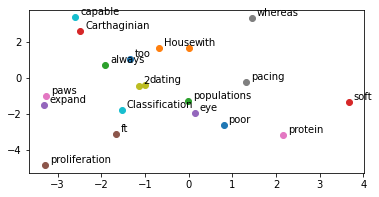

In [57]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()